In [1]:
%matplotlib ipympl
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df_pd = pd.read_csv('/home/music/Desktop/measure_model/feature_map/vit_b_p16_224_last_hidden_trained_lr2e_05.csv')

In [3]:
filter_classes = df_pd['classes'].unique()[:10]
index_filter_class = df_pd["classes"].isin(filter_classes)
df_colors = pd.read_csv('https://raw.githubusercontent.com/codebrainz/color-names/master/output/colors.csv',header=None)
df_colors.columns = ['color_name', 'color_description', 'hex_value', 'r', 'g','b']
color = pd.DataFrame(filter_classes, columns=['label']).join(df_colors["color_name"])
cdict = dict(color.values)

In [4]:
from sklearn.preprocessing import StandardScaler
def std_scale(data):
    sc = StandardScaler()
    return sc.fit_transform(data.T).T

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)

In [6]:
def pca_plot(data_path):
    df_pd = pd.read_csv(data_path)
    X = df_pd.loc[index_filter_class].iloc[:, :-1].values
    X = std_scale(X)
    y = df_pd.loc[index_filter_class].iloc[:, -1].values
    reduced_data = pca.fit_transform(X)
    print(pca.explained_variance_ratio_)
    x_plot = reduced_data[:, 0]
    y_plot = reduced_data[:, 1]
    z_plot = reduced_data[:, 2]
    
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    for g in filter_classes:
        ix = np.where(df_pd['classes'] == g)
        ax.scatter(x_plot[ix], y_plot[ix], z_plot[ix], label = g, s = 100)
    ax.legend()
    plt.show()

[0.10086813 0.06918357 0.06225187]


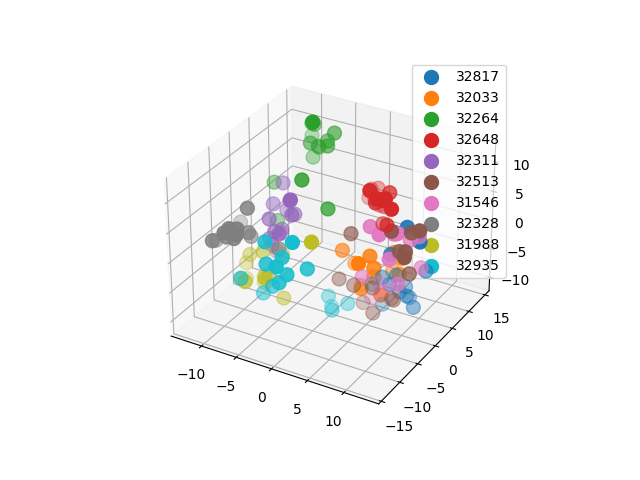

In [134]:
# last_hidden_trained_lr2e_05
pca_plot('/home/music/Desktop/measure_model/feature_map/vit_b_p16_224_last_hidden_trained_lr2e_05.csv')

[0.12155311 0.08222844 0.07228935]


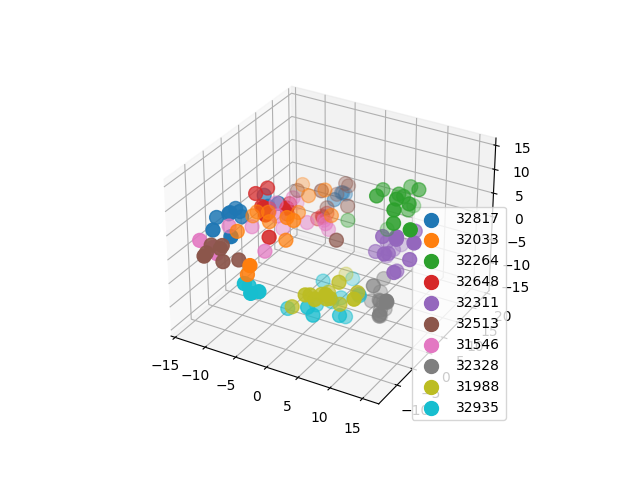

In [7]:
# last_hidden_trained_lr2e_05
pca_plot('/home/music/Desktop/measure_model/feature_map/vit_b_p16_224_last_hidden_trained_lr2e_05_cos.csv')

[0.1034956  0.0823474  0.06309748]


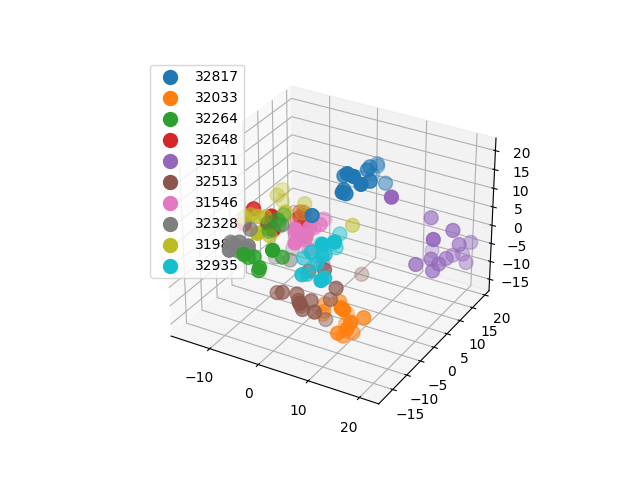

In [137]:
# efficientnet_b1
df_pd_eff = pd.read_csv("/home/music/Desktop/measure_model/feature_map/efficientnet_b1.csv")
index_filter_class_eff = df_pd_eff["classes"].isin(filter_classes)
X = df_pd_eff.loc[index_filter_class_eff].iloc[:, :-1].values
X = std_scale(X)
y = df_pd_eff.loc[index_filter_class_eff].iloc[:, -1].values
reduced_data = pca.fit_transform(X)
print(pca.explained_variance_ratio_)
x_plot = reduced_data[:, 0]
y_plot = reduced_data[:, 1]
z_plot = reduced_data[:, 2]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for g in filter_classes:
    ix = np.where(df_pd['classes'] == g)
    ax.scatter(x_plot[ix], y_plot[ix], z_plot[ix], label = g, s = 100)
ax.legend()
plt.show()